In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)


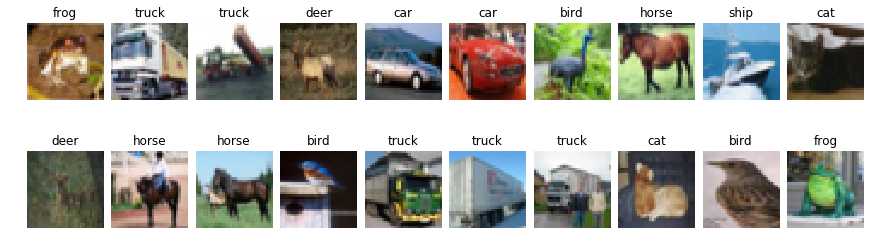

In [0]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

In [0]:
X_val = X_train[-10000:, :]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

In [0]:
print(y_train[10])
print(y_train_hot[10])

[4]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

---


In [0]:
# model = Sequential()

# # input
# model.add(Flatten(input_shape=(32, 32, 3)))

# # hidden layer
# model.add(Dense(500, activation='sigmoid'))
# model.add(Dense(500, activation='sigmoid'))

# # output
# model.add(Dense(10, activation='softmax'))

# # model.summary()

In [0]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )

In [0]:
model.fit( X_train, y_train_hot,
          validation_data=(X_val, y_val_hot),
          epochs = 10,
          batch_size = 200,
          verbose=2
         )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 - 2s - loss: 1.9116 - acc: 0.3223 - val_loss: 1.9224 - val_acc: 0.3078
Epoch 2/10
40000/40000 - 2s - loss: 1.9007 - acc: 0.3243 - val_loss: 1.9106 - val_acc: 0.3175
Epoch 3/10
40000/40000 - 2s - loss: 1.8918 - acc: 0.3267 - val_loss: 1.9047 - val_acc: 0.3189
Epoch 4/10
40000/40000 - 2s - loss: 1.8869 - acc: 0.3304 - val_loss: 1.9056 - val_acc: 0.3160
Epoch 5/10
40000/40000 - 2s - loss: 1.8837 - acc: 0.3321 - val_loss: 1.8942 - val_acc: 0.3286
Epoch 6/10
40000/40000 - 2s - loss: 1.8764 - acc: 0.3345 - val_loss: 1.8867 - val_acc: 0.3250
Epoch 7/10
40000/40000 - 2s - loss: 1.8729 - acc: 0.3354 - val_loss: 1.8828 - val_acc: 0.3298
Epoch 8/10
40000/40000 - 2s - loss: 1.8683 - acc: 0.3365 - val_loss: 1.8796 - val_acc: 0.3290
Epoch 9/10
40000/40000 - 2s - loss: 1.8632 - acc: 0.3399 - val_loss: 1.8749 - val_acc: 0.3333
Epoch 10/10
40000/40000 - 2s - loss: 1.8601 - acc: 0.3398 - val_loss: 1.8779 - val_acc: 0.3309


In [0]:
output = model.evaluate(X_test, y_test_hot)
print('akurasi = %.2f %%' % (output[1]*100) )

10000/10000 [==============================] - 1s 103us/sample - loss: 1.9236 - acc: 0.3240
akurasi = 32.40 %


In [0]:
from tensorflow.keras.models import save_model

In [0]:
save_model(model, 'model_saya.h5')

In [0]:
model.save('model_saya.h5')

In [0]:
from tensorflow.keras.models import load_model

model_kemarin = load_model('model_saya.h5')
model_kemarin.fit(X, y)